In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys

os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"] = "false"

import numpy as np
import h5py
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

print(jax.devices())
jax.config.update("jax_enable_x64", True)

sys.path.append('../../')

from cofilin.forward_model.fourier import my_ifft, my_fft, get_k, get_k_nyq, get_k_1D, get_k_rfft_1D
from cofilin.forward_model.fourier_aux import make_rfft3_arr_from_N_cube_numbers
from cofilin.forward_model.config import FMConfig, Constants
from cofilin.forward_model.fmodel import FModel
from cofilin.forward_model.cosmo import compute_or_load_pow_spec_cube
from cofilin.forward_model.ics import gen_input_arr, get_delta_in
from cofilin.forward_model.plot_utils import plot_cubes, compare_pow_spec

[cuda(id=0)]


vemos un 0.5% de std mayor pero cambia con distintas realizaciones asumimos que esta bien.

N_TR is not set. No bias in forward model.
N_TR is not set. No bias in forward model.
1.002588289794301


(<Figure size 1500x500 with 6 Axes>,
 array([<Axes: xlabel='$k$ [$h$/Mpc]'>, <Axes: xlabel='$k$ [$h$/Mpc]'>,
        <Axes: xlabel='$k$ [$h$/Mpc]'>], dtype=object))

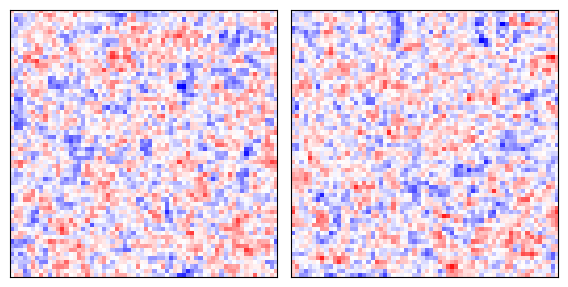

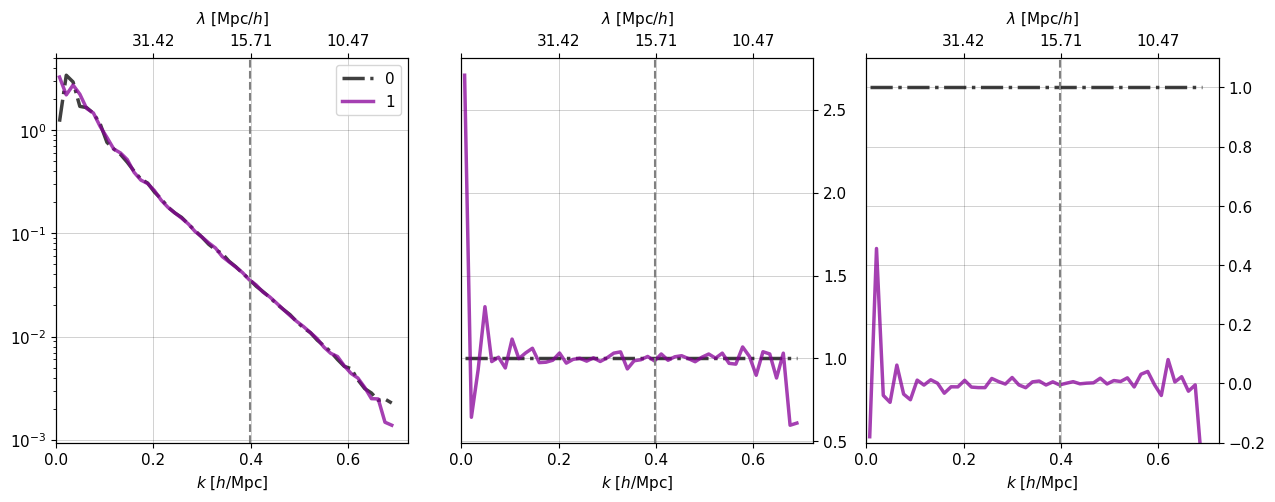

In [20]:
N, L, Z_I, Z_F = 64, 500, 99, 0
cte = Constants(N, L, Z_I, Z_F)

key = jax.random.PRNGKey(4)

fm_cfg_cwn = FMConfig(
    N,
    L,
    Z_I,
    Z_F,
    lpt_method="1LPT",
    input_kind="CWN",
)
fmodel_cwn = FModel(fm_cfg_cwn)
input_arr_cwn = gen_input_arr(key, cte)
din_cwn_hat = fmodel_cwn.delta_in(input_arr_cwn)
din_cwn = my_ifft(din_cwn_hat, cte.INV_L3)

fm_cfg_wn = FMConfig(
    N,
    L,
    Z_I,
    Z_F,
    lpt_method="1LPT",
    input_kind="WN",
)
fmodel_wn = FModel(fm_cfg_wn)
input_arr_wn = gen_input_arr(key, cte)
din_wn = my_ifft(fmodel_wn.delta_in(input_arr_wn), cte.INV_L3)

plot_cubes([din_wn, din_cwn], vlim=1e-1)

std_wn = jnp.std(din_wn)
std_cwn = jnp.std(din_cwn)
print(std_wn/std_cwn)


compare_pow_spec([din_cwn, din_wn], L)

In [ ]:
input_arr_cwn = make_rfft3_arr_from_N_cube_numbers(input_arr_wn, N)
# a = my_ifft(input_arr_wn, cte.INV_L3)



In [ ]:
# input_arr_wn = gen_input_arr(key, cte, fm_cfg_wn)
# input_arr_cwn = make_rfft3_arr_from_N_cube_numbers(input_arr_wn, N)

# input_arr_wn_hat = my_fft(input_arr_wn, cte.L3)

# cwn_2 = input_arr_cwn *cte.L3 / jnp.sqrt(cte.N3) / jnp.sqrt(2) 

# # print(jnp.std(input_arr_cwn)*cte.L3 / jnp.sqrt(cte.N3) / jnp.sqrt(2))
# # print(jnp.std(input_arr_wn_hat))

# jnp.isclose(cwn_2.real, input_arr_wn_hat.real, atol=)



Array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

pk_cube is not None, forcing no cross


(0.1, 4.0)

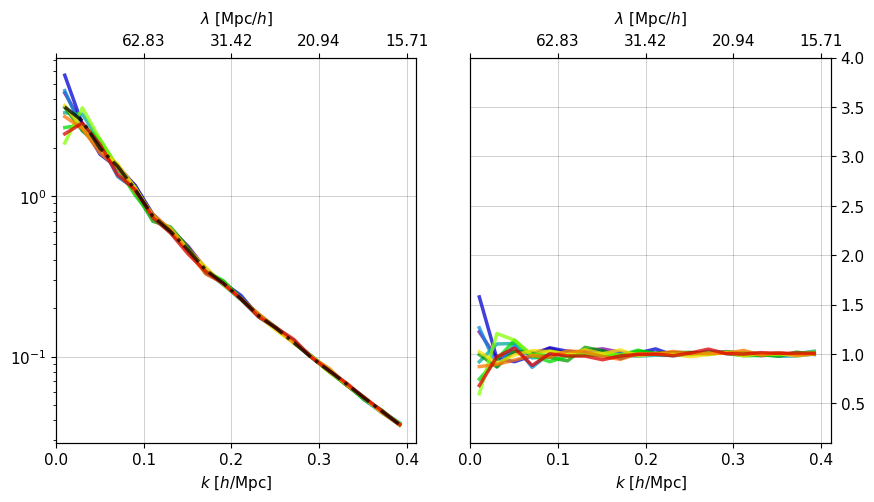

In [4]:
pk_cube = fm_cfg.pow_spec

key_amp = jax.random.PRNGKey(1)

M = 10
sks_amp = jax.random.split(key_amp, M)
dins = []

for i in range(M):
    amp_arr = gen_input_arr(sks_amp[i], cte, fm_cfg)
    din = my_ifft(fmodel.delta_in(amp_arr), cte.INV_L3)
    dins.append(din)


fig, axs = compare_pow_spec(
    dins,
    L,
    n_bins=20,
    pk_cube=pk_cube,
    no_labels=True,
    sphere_only=True,
)
axs[1].set_ylim(0.1, 4)

(<Figure size 500x500 with 4 Axes>,
 array([[<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >]], dtype=object))

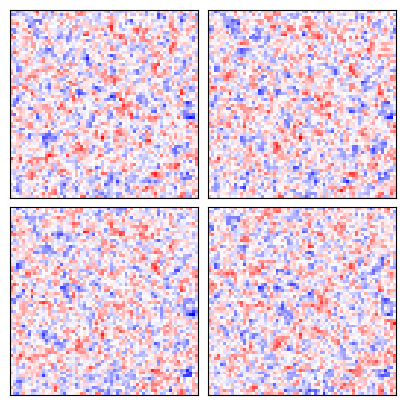

In [5]:
plot_cubes(dins[:4], vlim=1e-1)